# 1. Define the problem
In this project, we build and compare several machine learning models(Logistic Regression, K-Nearest Neighbor, Decision Tree, Support Vector Classifier) to classify the payment transaction to fraud or normal transaction. 

The data set was collected from Kaggle and it has credit card transactions made in two days by European card holders where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains 31 features in total. Because of the confidentiality issues 28 features(V1, V2, V3, V4...V28) are 
transformed with PCA. The only features which have not been transformed with PCA are 'Time', 'Amount', 'Class'(Response variable- Fraud - 1, Not Fraud - 0).

Our goal is to find out the best machine learning model that can classify the response varible to Fraud - 1, Not Fraud - 0. The performances of algorithms are evaluated through the following performance metrices: confusion matrix, precision, recall, and Precision-Recall curve(appropriate for imbalanced datasets). 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import numpy as np

# Lets load the data
   Link to download the data - https://www.kaggle.com/mlg-ulb/creditcardfraud

In [269]:
initial_data = pd.read_csv('C:/Users/veeru/Downloads/Data Scientist/My_1st_Payments_Data_Science_Project/'
                           'creditcard.csv')
initial_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Data Discovery
       2.1 Data Wrangling
       2.2 Exploratory Data Analysis

# 2.1 Data Wrangling

In [22]:
# Detect the missing values
missing_values = initial_data.isnull()

# Lets count the missing values in each column
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())  

Time
False    284807
Name: Time, dtype: int64
V1
False    284807
Name: V1, dtype: int64
V2
False    284807
Name: V2, dtype: int64
V3
False    284807
Name: V3, dtype: int64
V4
False    284807
Name: V4, dtype: int64
V5
False    284807
Name: V5, dtype: int64
V6
False    284807
Name: V6, dtype: int64
V7
False    284807
Name: V7, dtype: int64
V8
False    284807
Name: V8, dtype: int64
V9
False    284807
Name: V9, dtype: int64
V10
False    284807
Name: V10, dtype: int64
V11
False    284807
Name: V11, dtype: int64
V12
False    284807
Name: V12, dtype: int64
V13
False    284807
Name: V13, dtype: int64
V14
False    284807
Name: V14, dtype: int64
V15
False    284807
Name: V15, dtype: int64
V16
False    284807
Name: V16, dtype: int64
V17
False    284807
Name: V17, dtype: int64
V18
False    284807
Name: V18, dtype: int64
V19
False    284807
Name: V19, dtype: int64
V20
False    284807
Name: V20, dtype: int64
V21
False    284807
Name: V21, dtype: int64
V22
False    284807
Name: V22, dtype: int64
V23


There is no missing data in the given data set

In [268]:
# Lets check the format of the data types
initial_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All columns data types have the correct data types and it makes sense to have data types as only int and float since the data set contains only numerical variables(V1 to V28 are transformed with PCA so they are only float type and we observed time and amount columns have numerical values of type float and our response varibale "Class" has two values Fraud - 1, Not Fraud - 0 so it is integer type). Lets move to the next step

# 2.2 Exploratory Data Analysis

Lets understand the data distribution of non-transformed data- Time, Amount, and Class

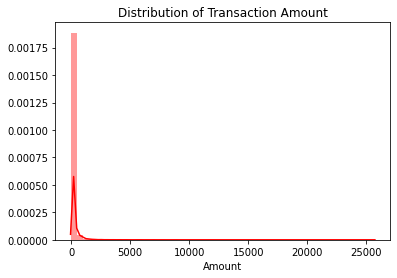

In [24]:
# Plotted the distribution of amount
dist_amount = sns.distplot(initial_data['Amount'], color="r")
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.show() 

Distribution shows that most of the transaction are below 70 dollars so there might be chances fraudsters tries to  mix up with this group and makes fraudlent transaction with below 70 dollars amount

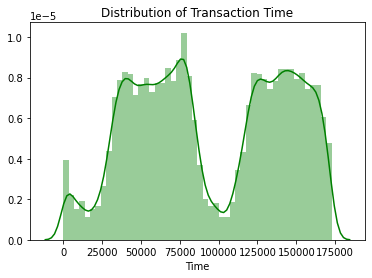

In [25]:
# Plotted the distribution of time
dist_time = sns.distplot(initial_data['Time'], color="g")
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.show() 

Distribution of time for two days shows that most of the transactions are taken place during the daytime
and peaked after business hours timing and later it's slowed down until the next day

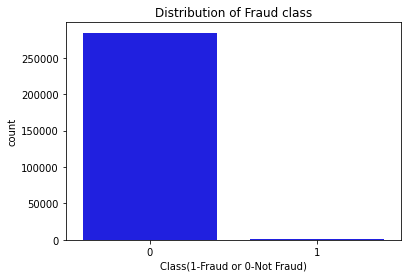

In [26]:
# Plotted the distribution of Fraud class
dist_class = sns.countplot(initial_data['Class'], color="b")
plt.title('Distribution of Fraud class')
plt.xlabel('Class(1-Fraud or 0-Not Fraud)')
plt.show() 

By seeing the distribution of Class(1-Fraud or 0- Not Fraud) its clear that the data is highly imbalanced.

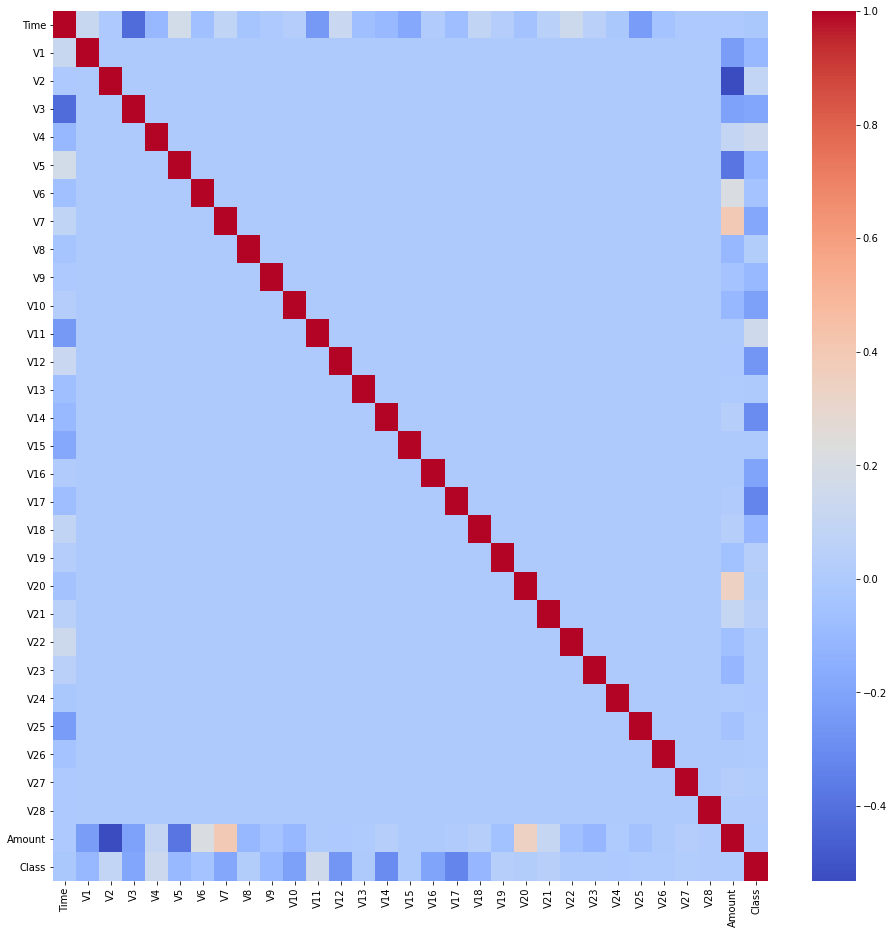

In [40]:
# Lets examine the correlation between the variables to make sure there is no strong collinearity between the independent 
# variables using heat map
plt.figure(figsize=(16,16))
sns.heatmap(initial_data.corr(), annot=False,cmap = 'coolwarm')
plt.show() 

From the heat map we have observed that all diagonal elements shown strong collinearity since it shows the collinearity between the same variables. We also noticed that there is correlation between Time and V3, Amount and V2,Amount and V5, Amount and V7, Amount and V20. Lets find out the exact correlation coefficient to make sure whether we can consider these correlations or not

In [39]:
print(initial_data[['Time', 'V3']].corr()) # showed negative relationship(~-0.41)
print(initial_data[['Amount', 'V2']].corr()) # showed negative relationship(~-0.53)
print(initial_data[['Amount', 'V5']].corr()) # showed negative relationship(~-0.39)
print(initial_data[['Amount', 'V7']].corr()) # showed negative relationship(~0.40)
print(initial_data[['Amount', 'V20']].corr()) # showed negative relationship(~0.33)
# None of them showed strong correlation that might effect the model results. We can move to the next steps.

          Time        V3
Time  1.000000 -0.419618
V3   -0.419618  1.000000
          Amount        V2
Amount  1.000000 -0.531409
V2     -0.531409  1.000000
          Amount        V5
Amount  1.000000 -0.386356
V5     -0.386356  1.000000
          Amount        V7
Amount  1.000000  0.397311
V7      0.397311  1.000000
          Amount       V20
Amount  1.000000  0.339403
V20     0.339403  1.000000


# 3. Develop
      3.1 Develop and Test Default Models
      3.2 Hyperparameters optimization and Select Best Model
      3.3 Plot precission recall curve 

# 3.1.1 Divide the data into train and test sets

In [41]:
# Lets define X, and y for our dataset
X = initial_data.drop(['Class'], axis = 1)
y = initial_data['Class']

Lets normalize the data. Its important to bring the data to be normally distributed for classification problems and normally distributed data will have mean 0 and standard deviation 1. This helps us to deal with the different ranges of time
and amount.

In [42]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print("number of test samples :", X_test.shape, y_test.shape)
print("number of training samples:",X_train.shape, y_train.shape)

number of test samples : (56962, 30) (56962,)
number of training samples: (227845, 30) (227845,)


As we observed, this data set is imbalanced so I assume undersampling will helps us to predict more accurate results.
However, there might be chance to miss the important information when we do undersampling. Lets measure the accuracy
by building a separate logistic regression model by training with skewed data(80% data from whole data) and another
logistic regression model build with undersampled data.

# 3.1.2 Dealing with imbalanced data set

In [44]:
# Lets first start with undersampled data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train_undersample, y_train_undersample = RandomUnderSampler(random_state=42).fit_sample(X_train,y_train)
X_val_undersample, y_val_undersample = RandomUnderSampler(random_state=42).fit_sample(X_test,y_test)

In [47]:
# Lets build our Logistic Regression model using undersampled training data
from sklearn.linear_model import LogisticRegression
log_rgr_undr_smpl = LogisticRegression().fit(X_train_undersample, y_train_undersample)

In [52]:
# Lets classify the response variable using logistic regression model with undersampled trained data
yhat_lgr_undr_smpl = log_rgr_undr_smpl.predict(X_train_undersample)

In [53]:
# Calculate the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
from sklearn import metrics
conf_mtrx_undr_smpl = metrics.confusion_matrix(y_train_undersample, yhat_lgr_undr_smpl, labels=[1,0])

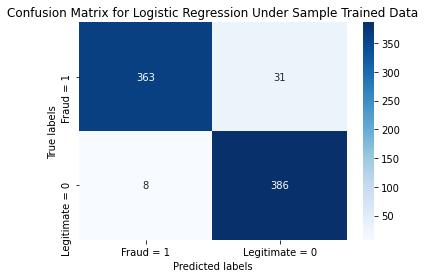

In [113]:
# Created reusable code and it will be useful in the next steps
def plt_cnfs_mtx(confusion_matrix, title):
    ax= plt.subplot()
    #fig, ax = plt.subplots(2, 2)
    sns.heatmap(confusion_matrix, annot=True, fmt= 'd',ax = ax, cmap = plt.cm.Blues); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title(title);
    ax.xaxis.set_ticklabels(['Fraud = 1', 'Legitimate = 0']); ax.yaxis.set_ticklabels(['Fraud = 1', 'Legitimate = 0']);
    plt.show()

plt_cnfs_mtx(conf_mtrx_undr_smpl, 'Confusion Matrix for Logistic Regression Under Sample Trained Data')

In [59]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_train_undersample, yhat_lgr_undr_smpl, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.98      0.92      0.95       394
           0       0.93      0.98      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788



Using undersampled data, logistic regression model performed well on training data with recall score of 92% and precission score of 98%. Lets see how the model trained using undersampled data will predict the fraud transaction on undersampled test data

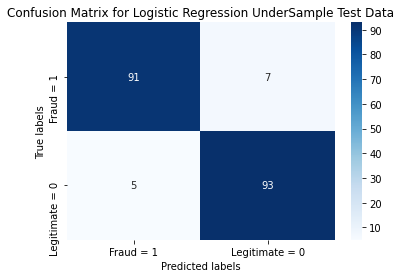

In [63]:
# Predicting the response variable using logistic regression model with test data
yhat_lgr_undr_smpl_test = log_rgr_undr_smpl.predict(X_val_undersample)
# Calculate and plot the confusion matrix
conf_mtrx_undr_smpl_test = metrics.confusion_matrix(y_val_undersample, yhat_lgr_undr_smpl_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_undr_smpl_test, 'Confusion Matrix for Logistic Regression UnderSample Test Data')

In [65]:
print(metrics.classification_report(y_val_undersample, yhat_lgr_undr_smpl_test, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94        98
           0       0.93      0.95      0.94        98

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196



Logistic regression model performed well on undersampled test data with recall score of 93% and precission score of 95%. Lets see how the model will work when we trained with 80% trained data taken from original data)

In [71]:
# Training the logistic regression model with 80% random sample data taken from the original data
lgr_whl_data = LogisticRegression().fit(X_train, y_train)

In [72]:
# Lets use the same undersample test data to classify the response variable using logistic regression
# model(trained with 80% trained data taken from original data)
yhat_lgr_whl_data = lgr_whl_data.predict(X_val_undersample)

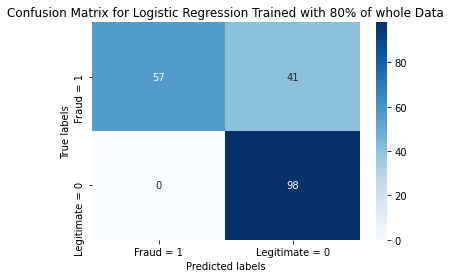

In [73]:
# Calculate and plot the confusion matrix
conf_mtrx_whl_data = metrics.confusion_matrix(y_val_undersample, yhat_lgr_whl_data, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_whl_data, 'Confusion Matrix for Logistic Regression Trained with 80% of whole Data')

In [74]:
print(metrics.classification_report(y_val_undersample, yhat_lgr_whl_data, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      0.58      0.74        98
           0       0.71      1.00      0.83        98

    accuracy                           0.79       196
   macro avg       0.85      0.79      0.78       196
weighted avg       0.85      0.79      0.78       196



Its clear that the logistic regression model showed low performance when trained with 80% data taken from
whole data with true fraud detection rate(recall rate) of 58. Logistic regression Model performed well when we trained with undersampled data with high recall rate of 93%. The same will be applicable for other classification models as well when we are dealing with unbalanced data. Moving forward we will use the undersampled data to train the different classification models. 

# 3.1.3 Build and test the following models using the default parameters
      1) Logistic Regression
      2) k-nearest neighbors(KNN)
      3) Decision Tree
      4) Support Vector Machine(SVM)

In [78]:
# Lets train the models

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_rgr = LogisticRegression().fit(X_train_undersample, y_train_undersample)

# k-nearest neighbors(KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_mdl = KNeighborsClassifier().fit(X_train_undersample, y_train_undersample)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dcs_tree = DecisionTreeClassifier().fit(X_train_undersample, y_train_undersample)

# Support Vector Machine(SVM)
from sklearn.svm import SVC
svc_mdl = SVC().fit(X_train_undersample, y_train_undersample)

In [84]:
# Lets predict the outcome of the models using undersample train data
yhat_log_rgr_trn = log_rgr.predict(X_train_undersample)
yhat_knn_mdl_trn = knn_mdl.predict(X_train_undersample)
yhat_dcs_tree_trn = dcs_tree.predict(X_train_undersample)
yhat_svc_mdl_trn = svc_mdl.predict(X_train_undersample)

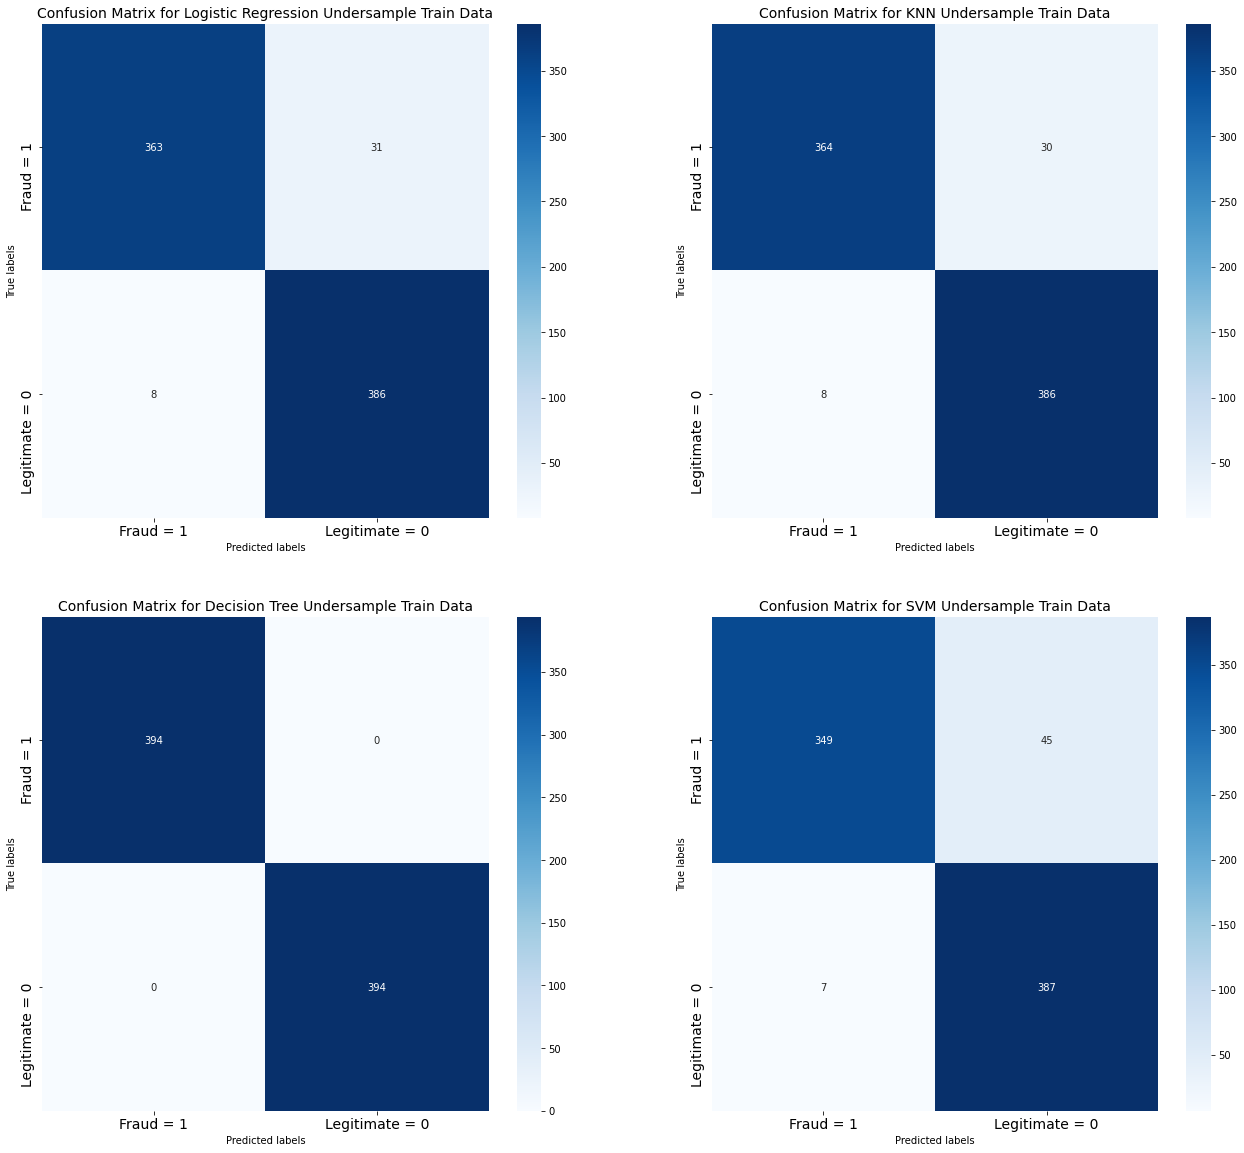

In [262]:
# Calculate and plot the confusion matrix for each model

conf_mtrx_log_rgr_trn = metrics.confusion_matrix(y_train_undersample, yhat_log_rgr_trn, labels=[1,0])

conf_mtrx_knn_mdl_trn = metrics.confusion_matrix(y_train_undersample, yhat_knn_mdl_trn, labels=[1,0])

conf_mtrx_dcs_tree_trn = metrics.confusion_matrix(y_train_undersample, yhat_dcs_tree_trn, labels=[1,0])

conf_mtrx_svc_mdl_trn = metrics.confusion_matrix(y_train_undersample, yhat_svc_mdl_trn, labels=[1,0])

# To keep it simple, lets plot the confusion matrix of all models in subplots
def conf_mtrx_subplots(conf_mtrx_log, title1, conf_mtrx_knn, title2, conf_mtrx_dcs, title3, conf_mtrx_svc, title4):
    
    fig, ax = plt.subplots(2, 2,figsize=(22,20))

    sns.heatmap(conf_mtrx_log, fmt = 'd', ax=ax[0][0], annot=True, cmap=plt.cm.Blues)
    ax[0][0].set_title(title1, fontsize=14)
    ax[0][0].set_xticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[0][0].set_yticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[0][0].set_xlabel('Predicted labels'); ax[0][0].set_ylabel('True labels');

    sns.heatmap(conf_mtrx_knn, fmt = 'd', ax=ax[0][1], annot=True, cmap=plt.cm.Blues)
    ax[0][1].set_title(title2, fontsize=14)
    ax[0][1].set_xticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[0][1].set_yticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[0][1].set_xlabel('Predicted labels'); ax[0][1].set_ylabel('True labels');

    sns.heatmap(conf_mtrx_dcs, fmt = 'd',ax=ax[1][0], annot=True, cmap=plt.cm.Blues)
    ax[1][0].set_title(title3, fontsize=14)
    ax[1][0].set_xticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[1][0].set_yticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[1][0].set_xlabel('Predicted labels'); ax[1][0].set_ylabel('True labels');

    sns.heatmap(conf_mtrx_svc, fmt = 'd',ax=ax[1][1], annot=True, cmap=plt.cm.Blues)
    ax[1][1].set_title(title4, fontsize=14)
    ax[1][1].set_xticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[1][1].set_yticklabels(['Fraud = 1', 'Legitimate = 0'], fontsize=14)
    ax[1][1].set_xlabel('Predicted labels'); ax[1][1].set_ylabel('True labels');


    plt.show()

    
    
conf_mtrx_subplots(conf_mtrx_log_rgr_trn, "Confusion Matrix for Logistic Regression Undersample Train Data",
                   conf_mtrx_knn_mdl_trn, "Confusion Matrix for KNN Undersample Train Data",
                   conf_mtrx_dcs_tree_trn, "Confusion Matrix for Decision Tree Undersample Train Data",
                   conf_mtrx_svc_mdl_trn, "Confusion Matrix for SVM Undersample Train Data")
    

In [149]:
# Printing the precision and recall, among other metrics

print('Logistic Regression Metrics on Training Data\n', metrics.classification_report(y_train_undersample, yhat_log_rgr_trn, labels=[1,0]))
print('k-Nearest Neighbors Metrics on Training Data\n', metrics.classification_report(y_train_undersample, yhat_knn_mdl_trn, labels=[1,0]))
print('Decision Tree Metrics on Training Data\n', metrics.classification_report(y_train_undersample, yhat_dcs_tree_trn, labels=[1,0]))
print('Support Vector Machine Metrics on Training Data\n', metrics.classification_report(y_train_undersample, yhat_svc_mdl_trn, labels=[1,0]))

Logistic Regression Metrics on Training Data
               precision    recall  f1-score   support

           1       0.98      0.92      0.95       394
           0       0.93      0.98      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

k-Nearest Neighbors Metrics on Training Data
               precision    recall  f1-score   support

           1       0.98      0.92      0.95       394
           0       0.93      0.98      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

Decision Tree Metrics on Training Data
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       394
           0       1.00      1.00      1.00       394

    accuracy                           1.00       

On training data, Decision tree performed best when compared with other models. Let's see how the models will acts on 
test data. 

In [150]:
# Lets validate the models using undersample test data
yhat_log_rgr_test = log_rgr.predict(X_val_undersample)
yhat_knn_mdl_test = knn_mdl.predict(X_val_undersample)
yhat_dcs_tree_test = dcs_tree.predict(X_val_undersample)
yhat_svc_mdl_test = svc_mdl.predict(X_val_undersample)

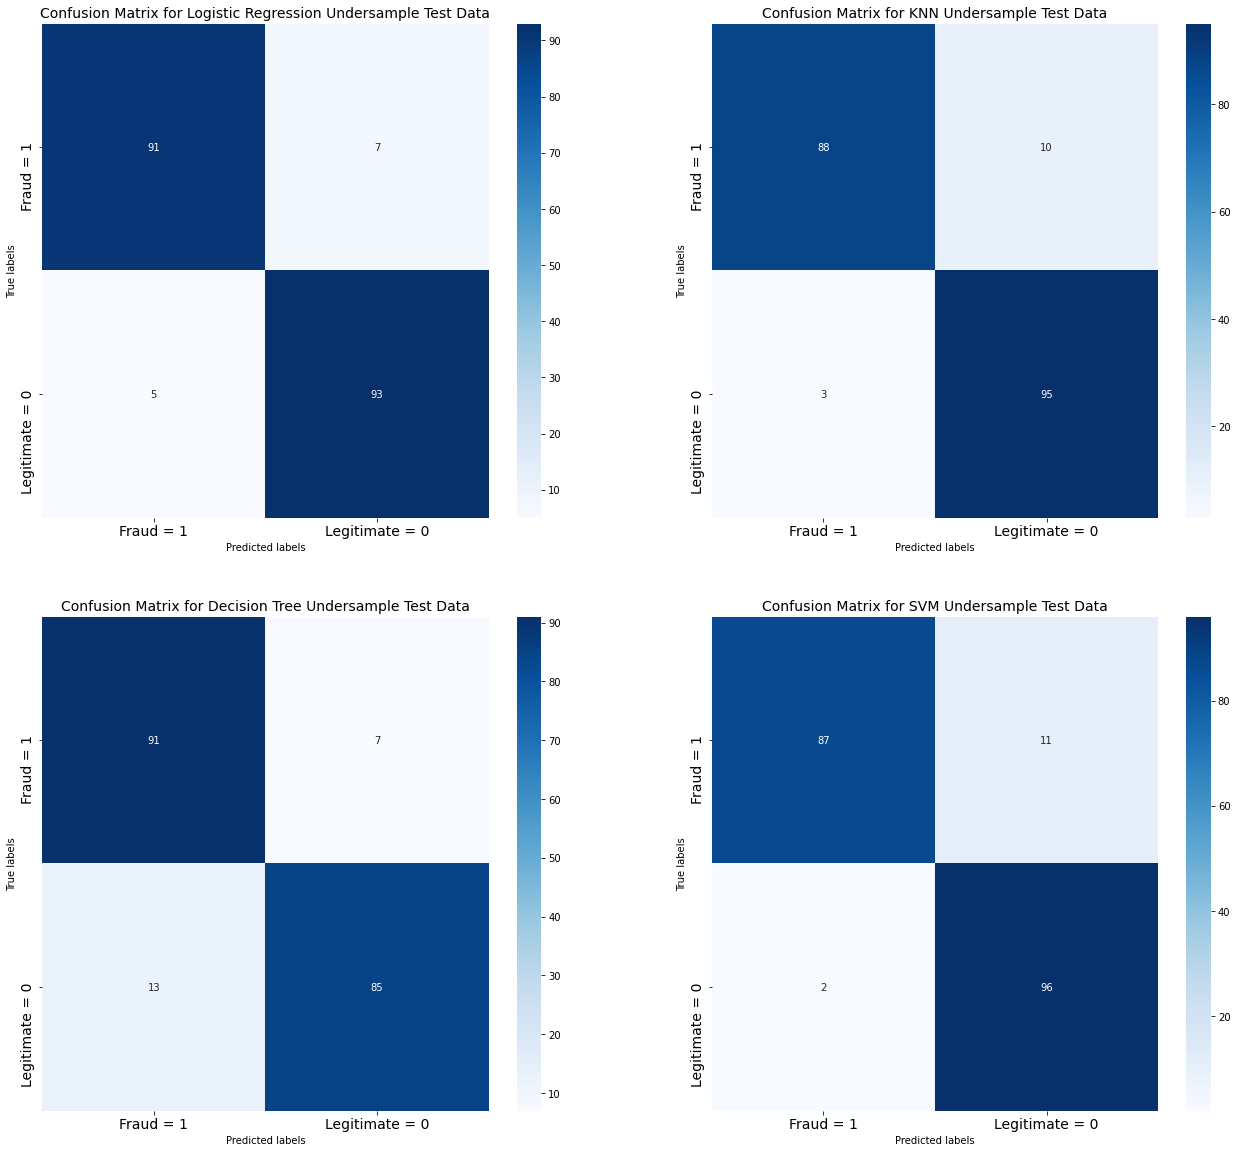

In [264]:
# Calculate and plot the confusion matrix for each model
conf_mtrx_log_rgr_undr_smpl_test = metrics.confusion_matrix(y_val_undersample, yhat_log_rgr_test, labels=[1,0])
conf_mtrx_knn_undr_smpl_test = metrics.confusion_matrix(y_val_undersample, yhat_knn_mdl_test, labels=[1,0])
conf_mtrx_dcs_tree_undr_smpl_test = metrics.confusion_matrix(y_val_undersample, yhat_dcs_tree_test, labels=[1,0])
conf_mtrx_svc_mdl_undr_smpl_test = metrics.confusion_matrix(y_val_undersample, yhat_svc_mdl_test, labels=[1,0])

conf_mtrx_subplots(conf_mtrx_log_rgr_undr_smpl_test, "Confusion Matrix for Logistic Regression Undersample Test Data",
                   conf_mtrx_knn_undr_smpl_test, "Confusion Matrix for KNN Undersample Test Data",
                   conf_mtrx_dcs_tree_undr_smpl_test, "Confusion Matrix for Decision Tree Undersample Test Data",
                   conf_mtrx_svc_mdl_undr_smpl_test,  "Confusion Matrix for SVM Undersample Test Data")

In [151]:
# Printing the precision and recall, among other metrics for undersample test data

print('Logistic Regression Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_log_rgr_test, labels=[1,0]))
print('k-Nearest Neighbors Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_knn_mdl_test, labels=[1,0]))
print('Decision Tree Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_dcs_tree_test, labels=[1,0]))
print('Support Vector Machine Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_svc_mdl_test, labels=[1,0]))

Logistic Regression Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.95      0.93      0.94        98
           0       0.93      0.95      0.94        98

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196

k-Nearest Neighbors Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.97      0.90      0.93        98
           0       0.90      0.97      0.94        98

    accuracy                           0.93       196
   macro avg       0.94      0.93      0.93       196
weighted avg       0.94      0.93      0.93       196

Decision Tree Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        98
           0       0.92      0.87      0.89        98

    accuracy              

Decision tree accuracy is low on undersample test data unlike the undersample train data. Logistic regression showed best performance on test data with precission score of 95% and recall percentage of 93%. Lets try to check the accuracy of the models by using another large sample of test data.

In [154]:
# Lets test our models using original test data(20% data divided from original data)
yhat_log_rgr_org_test = log_rgr.predict(X_test)
yhat_knn_mdl_org_test = knn_mdl.predict(X_test)
yhat_dcs_tree_org_test = dcs_tree.predict(X_test)
yhat_svc_mdl_org_test = svc_mdl.predict(X_test)

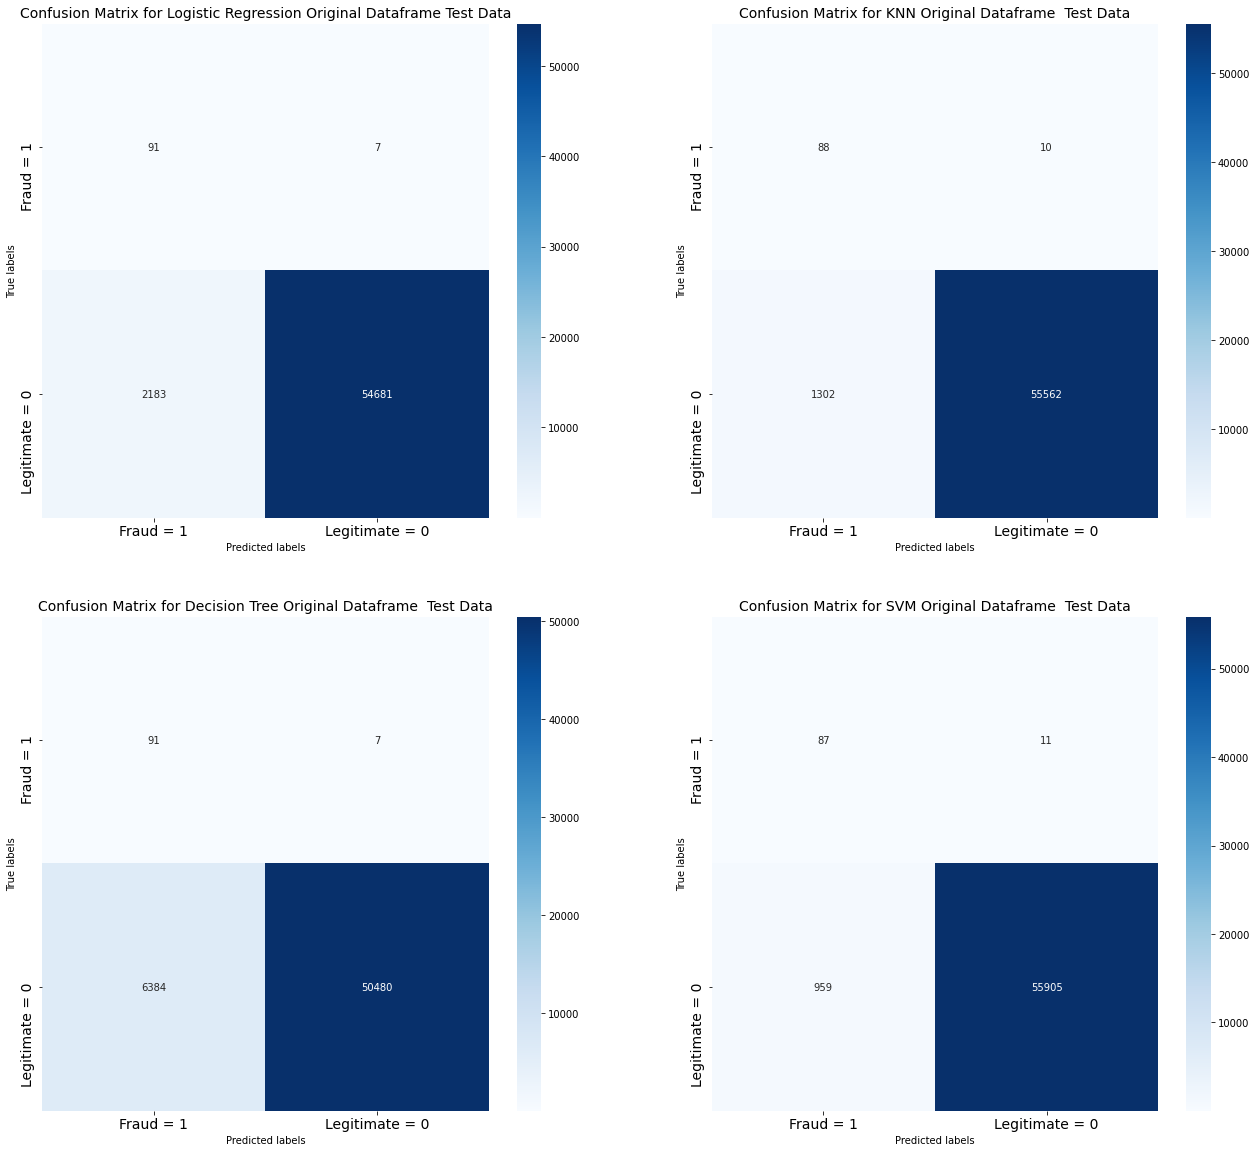

In [267]:
# Calculate and plot the confusion matrix
conf_mtrx_log_rgr_org_test = metrics.confusion_matrix(y_test, yhat_log_rgr_org_test, labels=[1,0])
conf_mtrx_knn_org_test = metrics.confusion_matrix(y_test, yhat_knn_mdl_org_test, labels=[1,0])
conf_mtrx_dcs_tree_org_test = metrics.confusion_matrix(y_test, yhat_dcs_tree_org_test, labels=[1,0])
conf_mtrx_svc_org_test = metrics.confusion_matrix(y_test, yhat_svc_mdl_org_test, labels=[1,0])

conf_mtrx_subplots(conf_mtrx_log_rgr_org_test, "Confusion Matrix for Logistic Regression Original Dataframe Test Data",
                   conf_mtrx_knn_org_test, "Confusion Matrix for KNN Original Dataframe  Test Data",
                   conf_mtrx_dcs_tree_org_test, "Confusion Matrix for Decision Tree Original Dataframe  Test Data",
                   conf_mtrx_svc_org_test,  "Confusion Matrix for SVM Original Dataframe  Test Data")

In [265]:
# Printing the precision and recall, among other metrics for original test data
print('Logistic Regression Metrics on Original Dataframe Test Data\n', metrics.classification_report(y_test, yhat_log_rgr_org_test, labels=[1,0]))
print('k-Nearest Neighbors Metrics on Original Dataframe Test Data\n', metrics.classification_report(y_test, yhat_knn_mdl_org_test, labels=[1,0]))
print('Decision Tree Metrics on Original Dataframe Test Data\n', metrics.classification_report(y_test, yhat_dcs_tree_org_test, labels=[1,0]))
print('Support Vector Machine Metrics on Original Dataframe Test Data\n', metrics.classification_report(y_test, yhat_svc_mdl_org_test, labels=[1,0]))

Logistic Regression Metrics on Original Dataframe Test Data
               precision    recall  f1-score   support

           1       0.04      0.93      0.08        98
           0       1.00      0.96      0.98     56864

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

k-Nearest Neighbors Metrics on Original Dataframe Test Data
               precision    recall  f1-score   support

           1       0.06      0.90      0.12        98
           0       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Decision Tree Metrics on Original Dataframe Test Data
               precision    recall  f1-score   support

           1       0.01      0.93      0.03        98
           0       1.00      0.89      0.94     56864

    a

Even on the original dataframe test data, logistic regression model showed best performance with good recall percentage of 93. However, the precision score went low for all models. Lets try to improve the accuracy of the models by tuning the parameters.

# 3.2 Hyperparameters tuning

## 3.2.1 Logistic Regression Hyperparameters Tunning

In [202]:
# Lets find out the best parameters using GridSearchCV

# Hyperparameters tunning for Logistic Regression
from sklearn.model_selection import GridSearchCV
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_rgr = GridSearchCV(LogisticRegression(solver='liblinear', max_iter = 10000),
                            log_reg_params, cv=3, scoring='roc_auc')
grid_log_rgr.fit(X_train_undersample, y_train_undersample)
grid_log_rgr.best_estimator_

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')

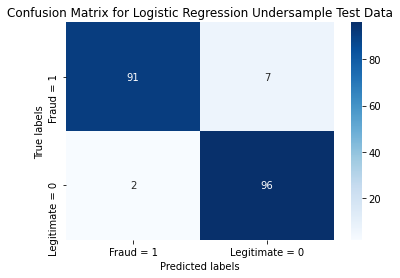

In [195]:
# Lets first test our tunned logistic regression model using undersampled test data
yhat_grid_log_rgr_test = grid_log_rgr.predict(X_val_undersample)
# Calculate and plot confusion matrix
conf_mtrx_grid_log_rgr_test = metrics.confusion_matrix(y_val_undersample, yhat_grid_log_rgr_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_log_rgr_test, 'Confusion Matrix for Logistic Regression Undersample Test Data')

In [187]:
# Performance metrics of Logistic Regression model using undersampled test data
print('Tunned Logistic Regression Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_grid_log_rgr_test, labels=[1,0]))

Tunned Logistic Regression Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.98      0.93      0.95        98
           0       0.93      0.98      0.96        98

    accuracy                           0.95       196
   macro avg       0.96      0.95      0.95       196
weighted avg       0.96      0.95      0.95       196



Tuned logistic regression model recall score is 93% and precission score improved from 95% to 98% on undersample test data when compared with logistic regression test accuracy using default parameters. Lets see how the model will behave with original test data. 

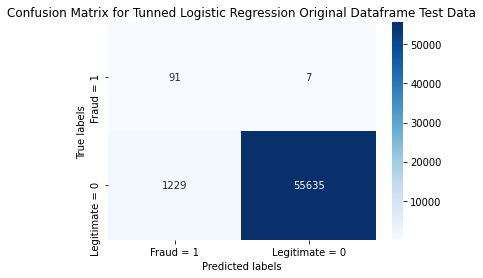

In [196]:
yhat_grid_log_rgr_org_test = grid_log_rgr.predict(X_test)
conf_mtrx_grid_log_rgr_org_test = metrics.confusion_matrix(y_test, yhat_grid_log_rgr_org_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_log_rgr_org_test, 'Confusion Matrix for Tunned Logistic Regression Original Dataframe Test Data')

In [189]:
# Performance metrics of Logistic Regression model using undersampled test data
print('Tunned Logistic Regression Metrics on Undersample Test Data\n', metrics.classification_report(y_test, yhat_grid_log_rgr_org_test, labels=[1,0]))

Tunned Logistic Regression Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.07      0.93      0.13        98
           0       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Tuned logistic regression model showed the decent performance on original dataframe test data as well with racall score of 93% and precission score improved from 0.04% to 0.07% on test data when compared with logistic regression test accuracy using default parameters. This results improved the overall performance of the logistic regression model not only detecting the fraud transactions but also reduced the number of wrongly classified regular transactions as fraud transactions.

## 3.2.2 k-Nearest Neighbors Hyperparameters Tunning

In [207]:
knears_params = {"n_neighbors": list(range(2,10,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_undersample, y_train_undersample)
grid_knears.best_estimator_

KNeighborsClassifier(n_neighbors=7)

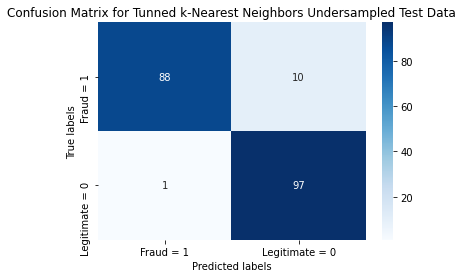

In [208]:
# Lets test the tunned K-Nearest Neighbors model using undersampled test data
yhat_grid_knn_test = grid_knears.predict(X_val_undersample)
# Calculate and plot confusion matrix
conf_mtrx_grid_knn_test = metrics.confusion_matrix(y_val_undersample, yhat_grid_knn_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_knn_test, 'Confusion Matrix for Tunned k-Nearest Neighbors Undersampled Test Data')

In [209]:
# Performance metrics of tunned  k-Nearest Neighbors model using undersampled test data
print('Tunned k-Nearest Neighbors Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_grid_knn_test, labels=[1,0]))

Tunned k-Nearest Neighbors Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.99      0.90      0.94        98
           0       0.91      0.99      0.95        98

    accuracy                           0.94       196
   macro avg       0.95      0.94      0.94       196
weighted avg       0.95      0.94      0.94       196



Similar to Logistic regression model, precission score was improved for tuned KNN model. Lets use the large test data to test our tuned KNN model. 

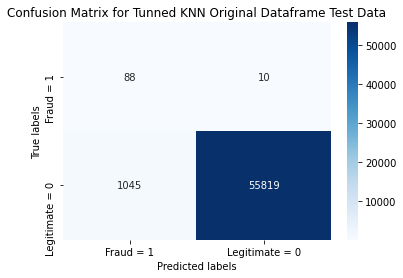

In [210]:
yhat_grid_knn_org_test = grid_knears.predict(X_test)
conf_mtrx_grid_knn_org_test = metrics.confusion_matrix(y_test, yhat_grid_knn_org_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_knn_org_test, 'Confusion Matrix for Tunned KNN Original Dataframe Test Data')

In [211]:
# Performance metrics of tunned  k-Nearest Neighbors model using original dataframe test data
print('Tunned k-Nearest Neighbors Metrics on original dataframe Test Data\n', metrics.classification_report(y_test, yhat_grid_knn_org_test, labels=[1,0]))

Tunned k-Nearest Neighbors Metrics on original dataframe Test Data
               precision    recall  f1-score   support

           1       0.08      0.90      0.14        98
           0       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



So far Logistic regression model performed well on original dataframe test data with recall score of 93%. Lets see how the 
other models(Decision Tree and SVM) perform.

# 3.2.3 Decision Tree Hyperparameters Tunning

In [216]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [2,3,4,5],
              "min_samples_leaf": [5,7,8,9]}
grid_dec_tree = GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_dec_tree.fit(X_train_undersample, y_train_undersample)
grid_dec_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

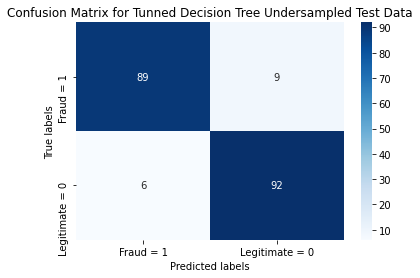

In [217]:
# Lets test the tunned Decision Tree model using undersampled test data
yhat_grid_dsc_tree_test = grid_dec_tree.predict(X_val_undersample)
# Calculate and plot confusion matrix
conf_mtrx_grid_dsc_tree_test = metrics.confusion_matrix(y_val_undersample, yhat_grid_dsc_tree_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_dsc_tree_test, 'Confusion Matrix for Tunned Decision Tree Undersampled Test Data')

In [225]:
# Performance metrics of Decision Tree using Undersample test data
print('Tunned Decision Tree Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_grid_dsc_tree_test, labels=[1,0]))

Tunned Decision Tree Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.94      0.91      0.92        98
           0       0.91      0.94      0.92        98

    accuracy                           0.92       196
   macro avg       0.92      0.92      0.92       196
weighted avg       0.92      0.92      0.92       196



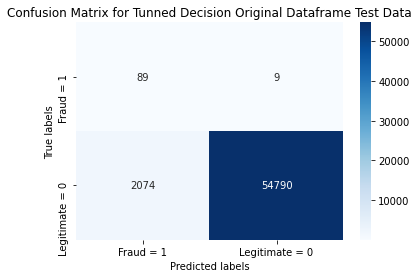

In [219]:
# Lets test the model using test data sample of orginal dataframe
yhat_grid_dcs_tree_org_test = grid_dec_tree.predict(X_test)
conf_mtrx_grid_dcs_tree_org_test = metrics.confusion_matrix(y_test, yhat_grid_dcs_tree_org_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_dcs_tree_org_test, 'Confusion Matrix for Tunned Decision Original Dataframe Test Data')

In [226]:
# Performance metrics of Decision Tree using original dataframe test data
print('Tunned Decision Tree Metrics on Original Dataframe Test Data\n', metrics.classification_report(y_test, yhat_grid_dcs_tree_org_test, labels=[1,0]))

Tunned Decision Tree Metrics on Original Dataframe Test Data
               precision    recall  f1-score   support

           1       0.04      0.91      0.08        98
           0       1.00      0.96      0.98     56864

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



# 3.2.4 Support Vector Machine(SVM) Hyperparameters Tunning

In [221]:
svc_params = {'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'gamma':[0.2, 0.3, 0.4],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
              }
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_undersample, y_train_undersample)
grid_svc.best_estimator_

SVC(C=0.5, gamma=0.2, kernel='linear')

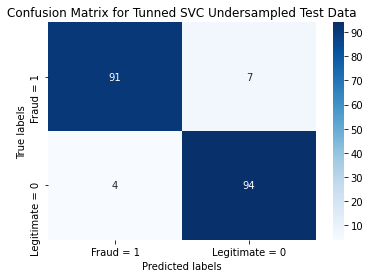

In [222]:
# Lets test the tunned Support Vector Classifier using undersampled test data
yhat_grid_svc_test = grid_svc.predict(X_val_undersample)
# Calculate and plot confusion matrix
conf_mtrx_grid_svc_test = metrics.confusion_matrix(y_val_undersample, yhat_grid_svc_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_svc_test, 'Confusion Matrix for Tunned SVC Undersampled Test Data')

In [227]:
# Performance metrics of SVC using Undersample test data
print('Tunned SVC Metrics on Undersample Test Data\n', metrics.classification_report(y_val_undersample, yhat_grid_svc_test, labels=[1,0]))

Tunned SVC Metrics on Undersample Test Data
               precision    recall  f1-score   support

           1       0.96      0.93      0.94        98
           0       0.93      0.96      0.94        98

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196



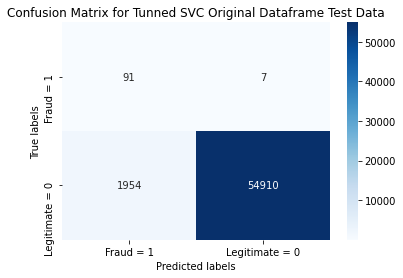

In [223]:
# Lets test the model using test data sample of orginal dataframe
yhat_grid_svc_org_test = grid_svc.predict(X_test)
conf_mtrx_grid_svc_org_test = metrics.confusion_matrix(y_test, yhat_grid_svc_org_test, labels=[1,0])
plt_cnfs_mtx(conf_mtrx_grid_svc_org_test, 'Confusion Matrix for Tunned SVC Original Dataframe Test Data')

In [228]:
# Performance metrics of tunned  SVC using original dataframe test data
print('Tunned SVC Metrics on original dataframe Test Data\n', metrics.classification_report(y_test, yhat_grid_svc_org_test, labels=[1,0]))

Tunned SVC Metrics on original dataframe Test Data
               precision    recall  f1-score   support

           1       0.04      0.93      0.08        98
           0       1.00      0.97      0.98     56864

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962



Logistic regression performed well compared with KNN, Decission Tree, and SVM models. On original dataframe test data, logistic regresion model identified the 91 fraud transactions out of 98 transactions with recall score of 93% and also it showed best performance to classify the non fraud precission by correctly identifying 55,635 transactions out of total non fraud(56,864) transactions. Logistic regression model did very well to identify the fruad transactions and in the same time model wrongly classified 1229 non fraud transactions as fraud transactions out of total non fraud(56,864) transactions and in terms of statistics, the model misclassifed only 0.02% of non fraud transactions. But in terms of business, there will be chances in production our model can classify the non fraud transactions as fraud transactions and it might end up blocking the customer's card, ulimately it takes the good customers away from the merchants. So its important to make our model to reduce the misclassifcation of non fraud transactions as much as possible since its very important for financial organization to address the risk along with customer satisfaction. 

Lets plot the precision recall curve to review both precision and recall of Logistic Regression at different thresholds and it will be useful since there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1). 

# 3.3 Plot precission recall curve

Logistic: f1=0.953 auc=0.983


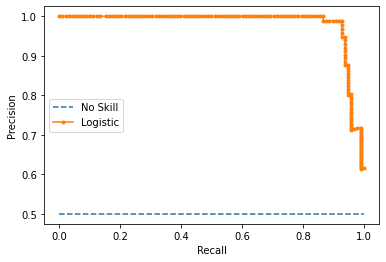

In [232]:
# Calculate precission recall curve using undersample data
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# Predict probabilities using tunned  logistic regression model
lr_probs = grid_log_rgr.predict_proba(X_val_undersample)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid_log_rgr.predict(X_val_undersample)
lr_precision, lr_recall, _ = precision_recall_curve(y_val_undersample, lr_probs)
lr_f1, lr_auc = f1_score(y_val_undersample, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val_undersample[y_val_undersample==1]) / len(y_val_undersample)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Precission recall curve showed us visually that there are thresholds where logistic regression model showed decent precision
and recall scores. Lets identify the best threshold for our logistic regression model. 

In [236]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score, accuracy_score, precision_score, \
    plot_confusion_matrix
def model_prfm_diff_thresholds():
    for threshold in np.linspace (0, 1, 20):
        y_predict = grid_log_rgr.predict_proba(X_test)[:,1] >= threshold
        f1 = f1_score(y_test,y_predict)
        acc = accuracy_score(y_test,y_predict)
        rec = recall_score(y_test,y_predict)
        pre = precision_score(y_test,y_predict)
        print(threshold, f1, acc, rec, pre)

print(model_prfm_diff_thresholds())

0.0 0.0034349807220469685 0.0017204452090867595 1.0 0.0017204452090867595
0.05263157894736842 0.004401823612639522 0.2217443207752537 1.0 0.0022057665038600913
0.10526315789473684 0.008385925477651941 0.597275376566834 0.9897959183673469 0.00421080048619552
0.15789473684210525 0.015058069683620343 0.7841192373863277 0.9591836734693877 0.0075886009526116086
0.21052631578947367 0.023981433728726145 0.8671043853797268 0.9489795918367347 0.012144162966832071
0.2631578947368421 0.03374908290535583 0.9075172922299076 0.9387755102040817 0.017183414269704895
0.3157894736842105 0.04661768431720294 0.9339384150837401 0.9387755102040817 0.02390231228890621
0.3684210526315789 0.06337047353760444 0.9527755345669042 0.9285714285714286 0.03280461427541456
0.42105263157894735 0.08394833948339483 0.9651346511709561 0.9285714285714286 0.04396135265700483
0.47368421052631576 0.1116564417177914 0.9745795442575752 0.9285714285714286 0.05939947780678851
0.5263157894736842 0.14457831325301204 0.9813033250237

c:\users\veeru\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looking at the thresholds, we can make our model stabilized if we use threshold value as 0.84(Recall - 86.73, Precision-39.35). It will be always good to have balanced model even though changing the threshold from 0.5(default) to 0.84 brings down the recall percentage from 93 to 86.73 but the precision score is jumped from 0.07 to 0.39. Lets deploy and test our logistic regression model with threshold 0.84

# 4. Deploy

In [239]:
# Predict class 1 if probability of being in class 1 is greater than threshold
# (grid_log_rgr.predict(X_test) does this automatically with a threshold of 0.5)
y_predict = (grid_log_rgr.predict_proba(X_test)[:,1] >= 0.84) #(Threshold)
y_predict

array([ True, False, False, ..., False, False, False])

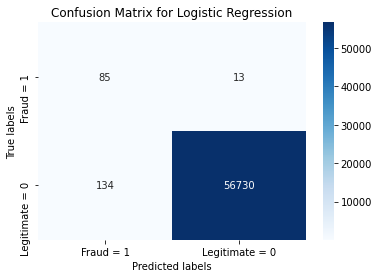

In [241]:
# Calculate and plot confusion matrix
conf_mtrx = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
plt_cnfs_mtx(conf_mtrx, 'Confusion Matrix for Logistic Regression')

In [242]:
# Performance metrics of final Logistic Regression Model
print('Performance Metrics of Logistic Regression Model\n', metrics.classification_report(y_test, y_predict, labels=[1,0]))

Performance Metrics of Logistic Regression Model
               precision    recall  f1-score   support

           1       0.39      0.87      0.54        98
           0       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.69      0.93      0.77     56962
weighted avg       1.00      1.00      1.00     56962



Conclusion: Hyperparameter optimization and thershold change helped us to reduce the logistic regression model misclasification of non fraud transactions (in original dataframe test data) from 2183 to 134 transactions and also precission score improved from 0.04%(default) to 0.39%. Now, logisitic regression model can classify the fraud transactions with minimum number of misclasification. However, in order to improve the precission score we have bring down our recall score from 93% to 87%. 
Next steps: 
Conduct research and identify the better techniques to improve the accuracy of model which can give even better precission and recall score to identify the fraud transactions. 